1. INSTALLING DEPENDENCIES AND SETUP

In [5]:
pip install tensorflow 


  Using cached tensorflow-2.16.2-cp310-cp310-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.16.2-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached w

In [7]:

!pip list

Package                      Version
---------------------------- --------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.6.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
debugpy                      1.8.2
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.25
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
importlib_metadata           8.0.0
ipykernel                    6.29.5
ipython                      8.26.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
keras                        3.4.1
libclang                     18.1.1
Markdown                     3.6
markdown

In [8]:
import tensorflow as tf
import os

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

In [13]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


2. CLEANING IMAGES

In [15]:
import cv2
import imghdr


In [17]:
data_dir = 'data' 

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy_people\24px.svg
Image not in ext list data\happy_people\7-Habits-of-Happy-People.png
Image not in ext list data\happy_people\businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data\happy_people\community-young-people-happy-together_23-2148431416.jpg
Image not in ext list data\happy_people\depositphotos_317939792-stock-photo-young-woman-isolated-yel.jpg
Image not in ext list data\happy_people\depositphotos_391577690-stock-photo-cheerful-woman-outstretc.jpg
Image not in ext list data\happy_people\depositphotos_8807359-stock-photo-mixed-race-man-smiling.jpg
Image not in ext list data\happy_people\desktop_searchbox_sprites318_hr.webp
Image not in ext list data\happy_people\flat-design-jumping-people_23-2148572791.jpg
Image not in ext list data\happy_people\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy_people\hand-drawn-youth-day-jumping-people_23-2148569491.jpg
Image not in ext list data\happy_people\h

3. LOADING DATA

In [20]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install matplotlib 

  Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp310-cp310-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
from matplotlib import pyplot as plt


In [23]:

data = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


In [24]:
data_iterator = data.as_numpy_iterator()

In [26]:

batch = data_iterator.next()

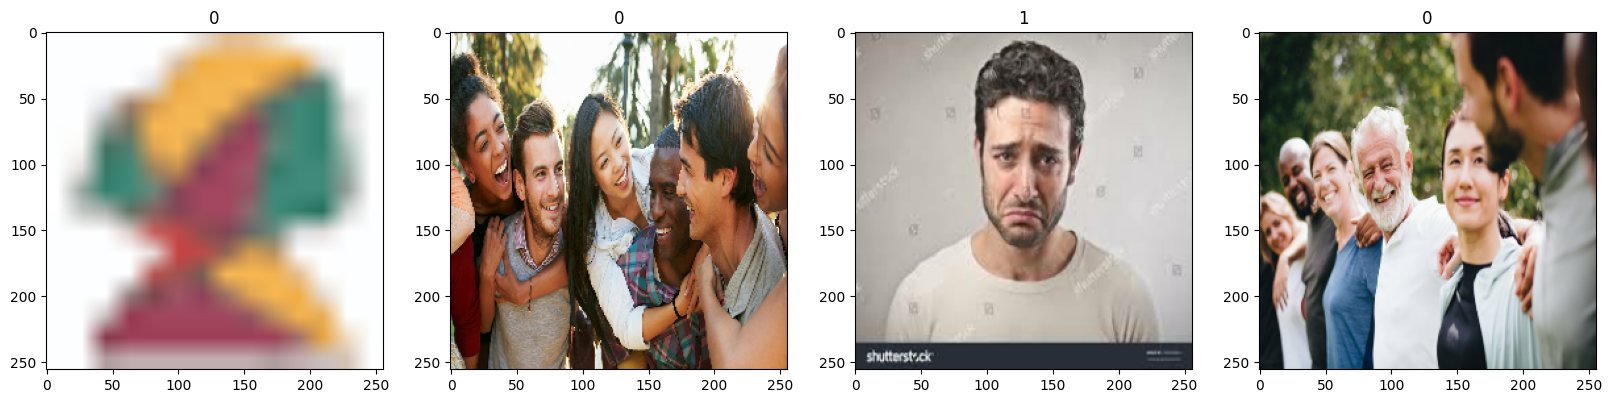

In [27]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. SCALE DATA

In [28]:
data = data.map(lambda x,y: (x/255, y))

In [29]:

data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

5. SPLIT DATA

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:

train_size

3

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. MODEL BUILDING (CNN)

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\amber\anaconda3\envs\py410\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

7. Training 

In [40]:
logdir='logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.4766 - loss: 0.7814 - val_accuracy: 0.4375 - val_loss: 0.7742
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.4688 - loss: 0.7200 - val_accuracy: 0.7500 - val_loss: 0.5185
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.6589 - loss: 0.6044 - val_accuracy: 0.6875 - val_loss: 0.5031
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.7214 - loss: 0.4813 - val_accuracy: 0.7812 - val_loss: 0.4398
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8333 - loss: 0.4325 - val_accuracy: 0.8125 - val_loss: 0.4245
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7513 - loss: 0.4371 - val_accuracy: 0.7812 - val_loss: 0.4378
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.7526 - loss: 0.3722 - val_accuracy: 0.9375 - val_loss: 0.3480
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8594 - loss: 0.3519 - val_accuracy: 0.9062 - val_loss:

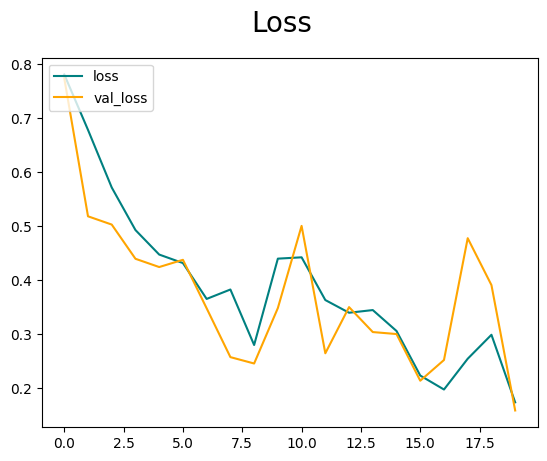

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

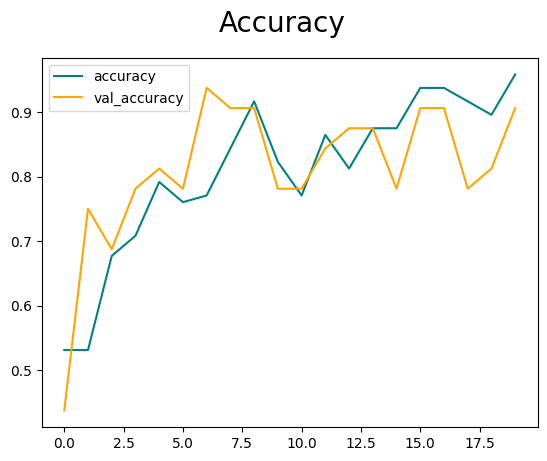

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. MODEL EVALUATION

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [48]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


10. TEST

In [49]:
import cv2

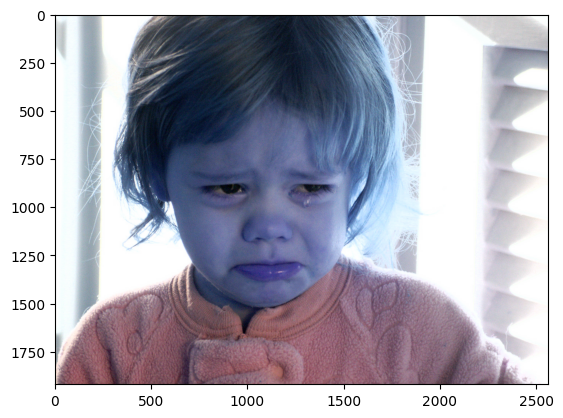

In [61]:
img = cv2.imread('Crying_girl.jpg')
plt.imshow(img)
plt.show()

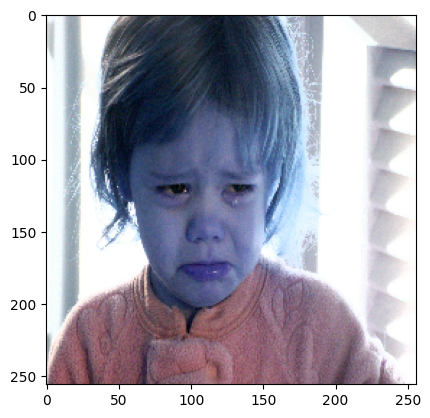

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [64]:

yhat

array([[0.93707544]], dtype=float32)

In [65]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


11. SAVE THE MODEL

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save(os.path.join('models','imageclassifier.h5'))

In [70]:
new_model = load_model('models/imageclassifier.h5')

In [71]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.93707544]], dtype=float32)